## Task 01 : Explore and prepare the dataset

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('customer_booking.csv', encoding='latin1')

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [49]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [50]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

## Exploring the data 

### Column 01 : num_passengers

In [51]:
print("the max number of passengers in a booking is : " , max(df['num_passengers'].unique()))


the max number of passengers in a booking is :  9


### Column 02 : sales channel 

In [52]:
# Print unique sales channels
unique_sales_channels = df['sales_channel'].unique()
print("The possible sales channels to make a booking are:", unique_sales_channels)

# Print distribution of sales channels
sales_channel_distribution = df['sales_channel'].value_counts()
print("Distribution of sales channels:")
print(sales_channel_distribution)

# Print the most common sales channel
most_common_channel = sales_channel_distribution.idxmax()
print("So, most bookings are done through the", most_common_channel)

# Encode the sales channels as numeric values
df = pd.get_dummies(df, columns=['sales_channel'])


The possible sales channels to make a booking are: ['Internet' 'Mobile']
Distribution of sales channels:
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
So, most bookings are done through the Internet


### Column 03 : trip type

In [53]:
# Print unique trip types
unique_trip_types = df['trip_type'].unique()
print("The possible trip types are:", unique_trip_types)

# Print distribution of trip types
trip_type_distribution = df['trip_type'].value_counts()
print("Distribution of trip types:")
print(trip_type_distribution)

# Print the most common trip type
most_common_trip_type = trip_type_distribution.idxmax()
print("So, most trips are of type:", most_common_trip_type)

# Encode the trip types as numeric values
df = pd.get_dummies(df, columns=['trip_type'])

The possible trip types are: ['RoundTrip' 'CircleTrip' 'OneWay']
Distribution of trip types:
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
So, most trips are of type: RoundTrip


### Column 04 : Purchase Lead

Maximum purchase lead: 867
Minimum purchase lead: 0
Mean purchase lead: 84.94048
Purchase lead is the number of days between the travel date and the booking date.


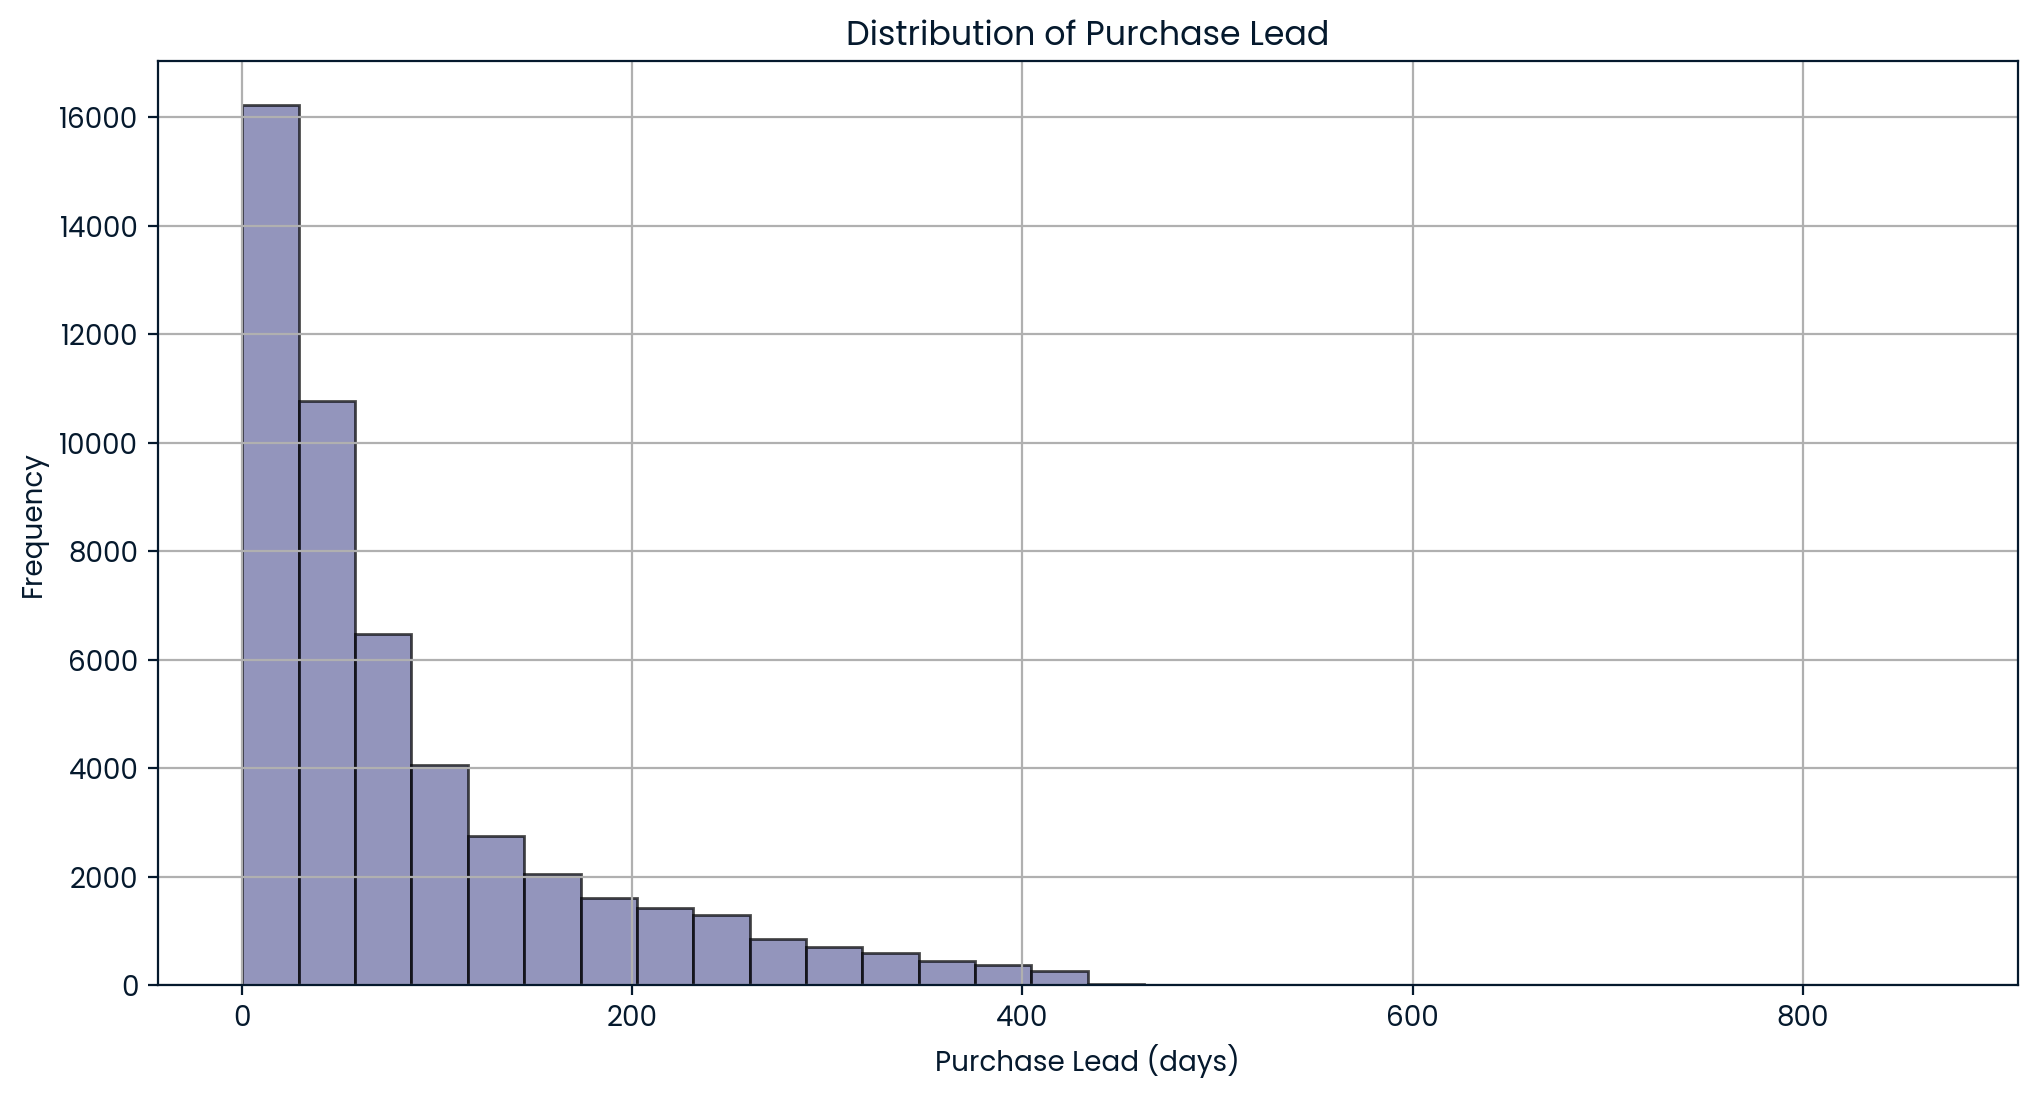

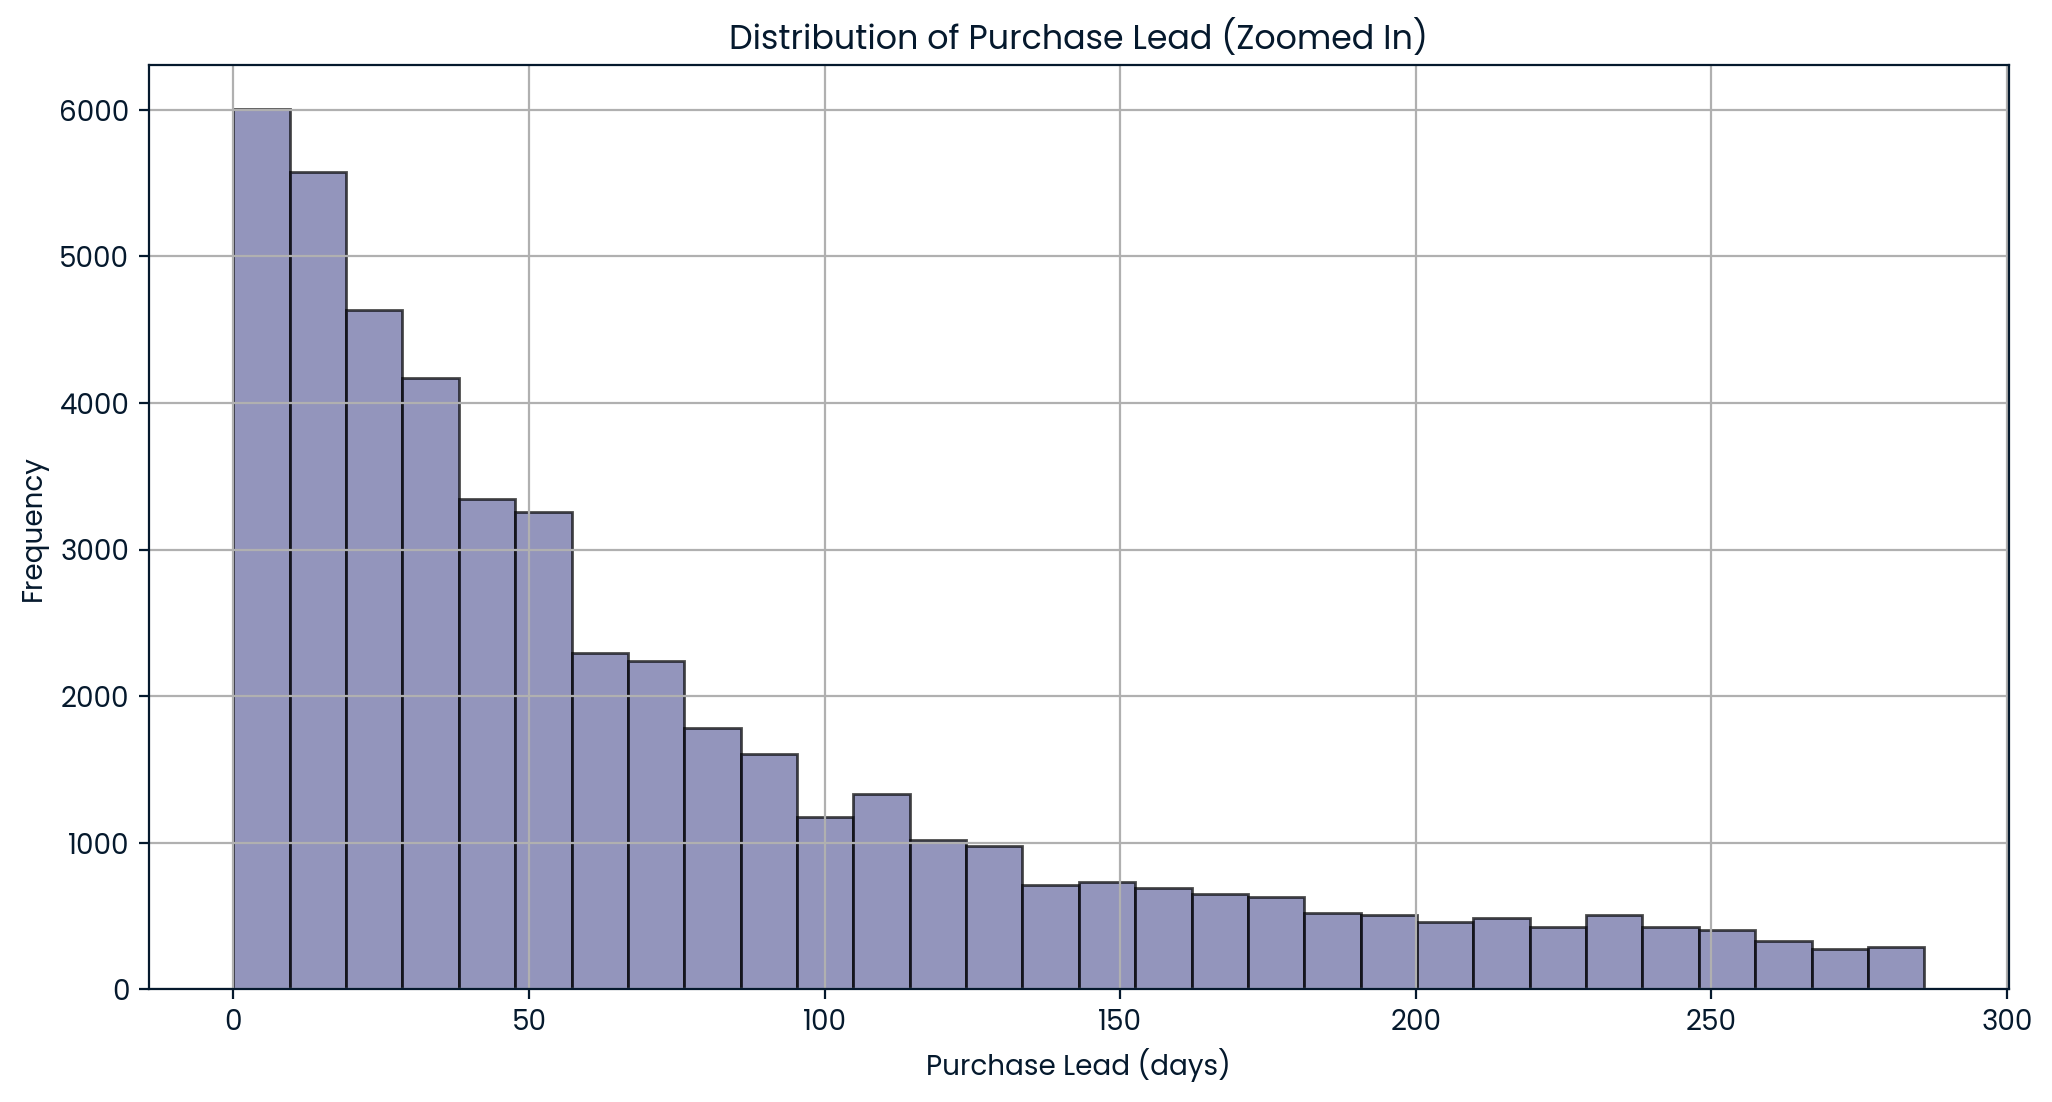

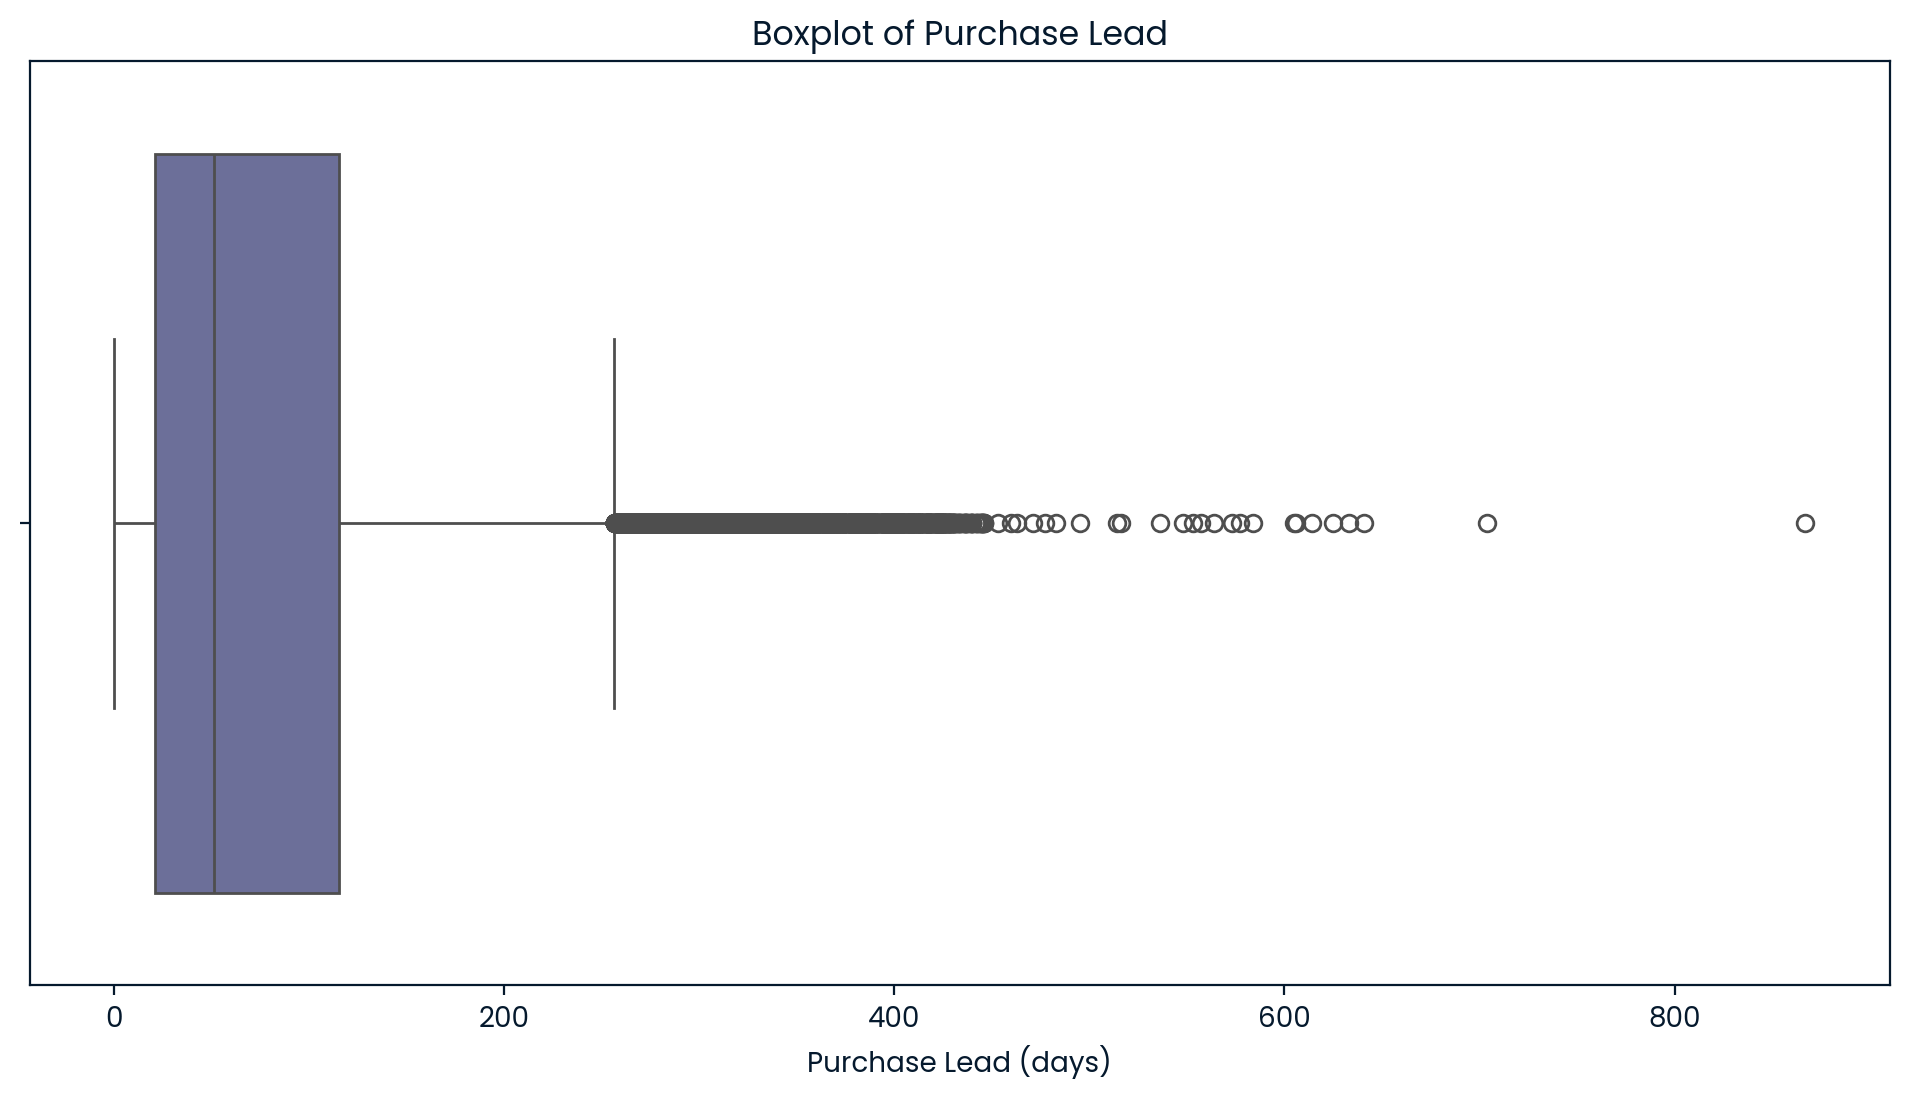

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for 'purchase_lead'
max_purchase_lead = df['purchase_lead'].max()
min_purchase_lead = df['purchase_lead'].min()
mean_purchase_lead = df['purchase_lead'].mean()

print("Maximum purchase lead:", max_purchase_lead)
print("Minimum purchase lead:", min_purchase_lead)
print("Mean purchase lead:", mean_purchase_lead)
print("Purchase lead is the number of days between the travel date and the booking date.")

# Plotting the distribution of 'purchase_lead' with a histogram
plt.figure(figsize=(12, 6))
plt.hist(df['purchase_lead'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Purchase Lead')
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of 'purchase_lead' without outliers (zoomed in)
plt.figure(figsize=(12, 6))
plt.hist(df['purchase_lead'][df['purchase_lead'] < df['purchase_lead'].quantile(0.95)], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Purchase Lead (Zoomed In)')
plt.xlabel('Purchase Lead (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting a boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['purchase_lead'])
plt.title('Boxplot of Purchase Lead')
plt.xlabel('Purchase Lead (days)')
plt.show()


On most airlines, you cannot book more than a year in advance. Airlines typically release their flight schedules and open bookings around 6 to 11 months in advance.  so more than 365 days , are considered as outliers 

In [55]:
# Number of rows having outliers 
number_of_outliers = df[df['purchase_lead'] > 365].shape[0]
print(number_of_outliers)


838


In [56]:
# I'll remove outliers 
df = df[df['purchase_lead'] <= 365]
print("After removing outliers:")
print(df)

After removing outliers:
       num_passengers  purchase_lead  ...  trip_type_OneWay  trip_type_RoundTrip
0                   2            262  ...             False                 True
1                   1            112  ...             False                 True
2                   2            243  ...             False                 True
3                   1             96  ...             False                 True
4                   2             68  ...             False                 True
...               ...            ...  ...               ...                  ...
49995               2             27  ...             False                 True
49996               1            111  ...             False                 True
49997               1             24  ...             False                 True
49998               1             15  ...             False                 True
49999               1             19  ...             False                 True

[4

### Column 05 : length of stay

Maximum length of stay: 778
Minimum length of stay: 0
Mean length of stay: 23.22897766567674
Length of stay is the number of days spent at the destination.


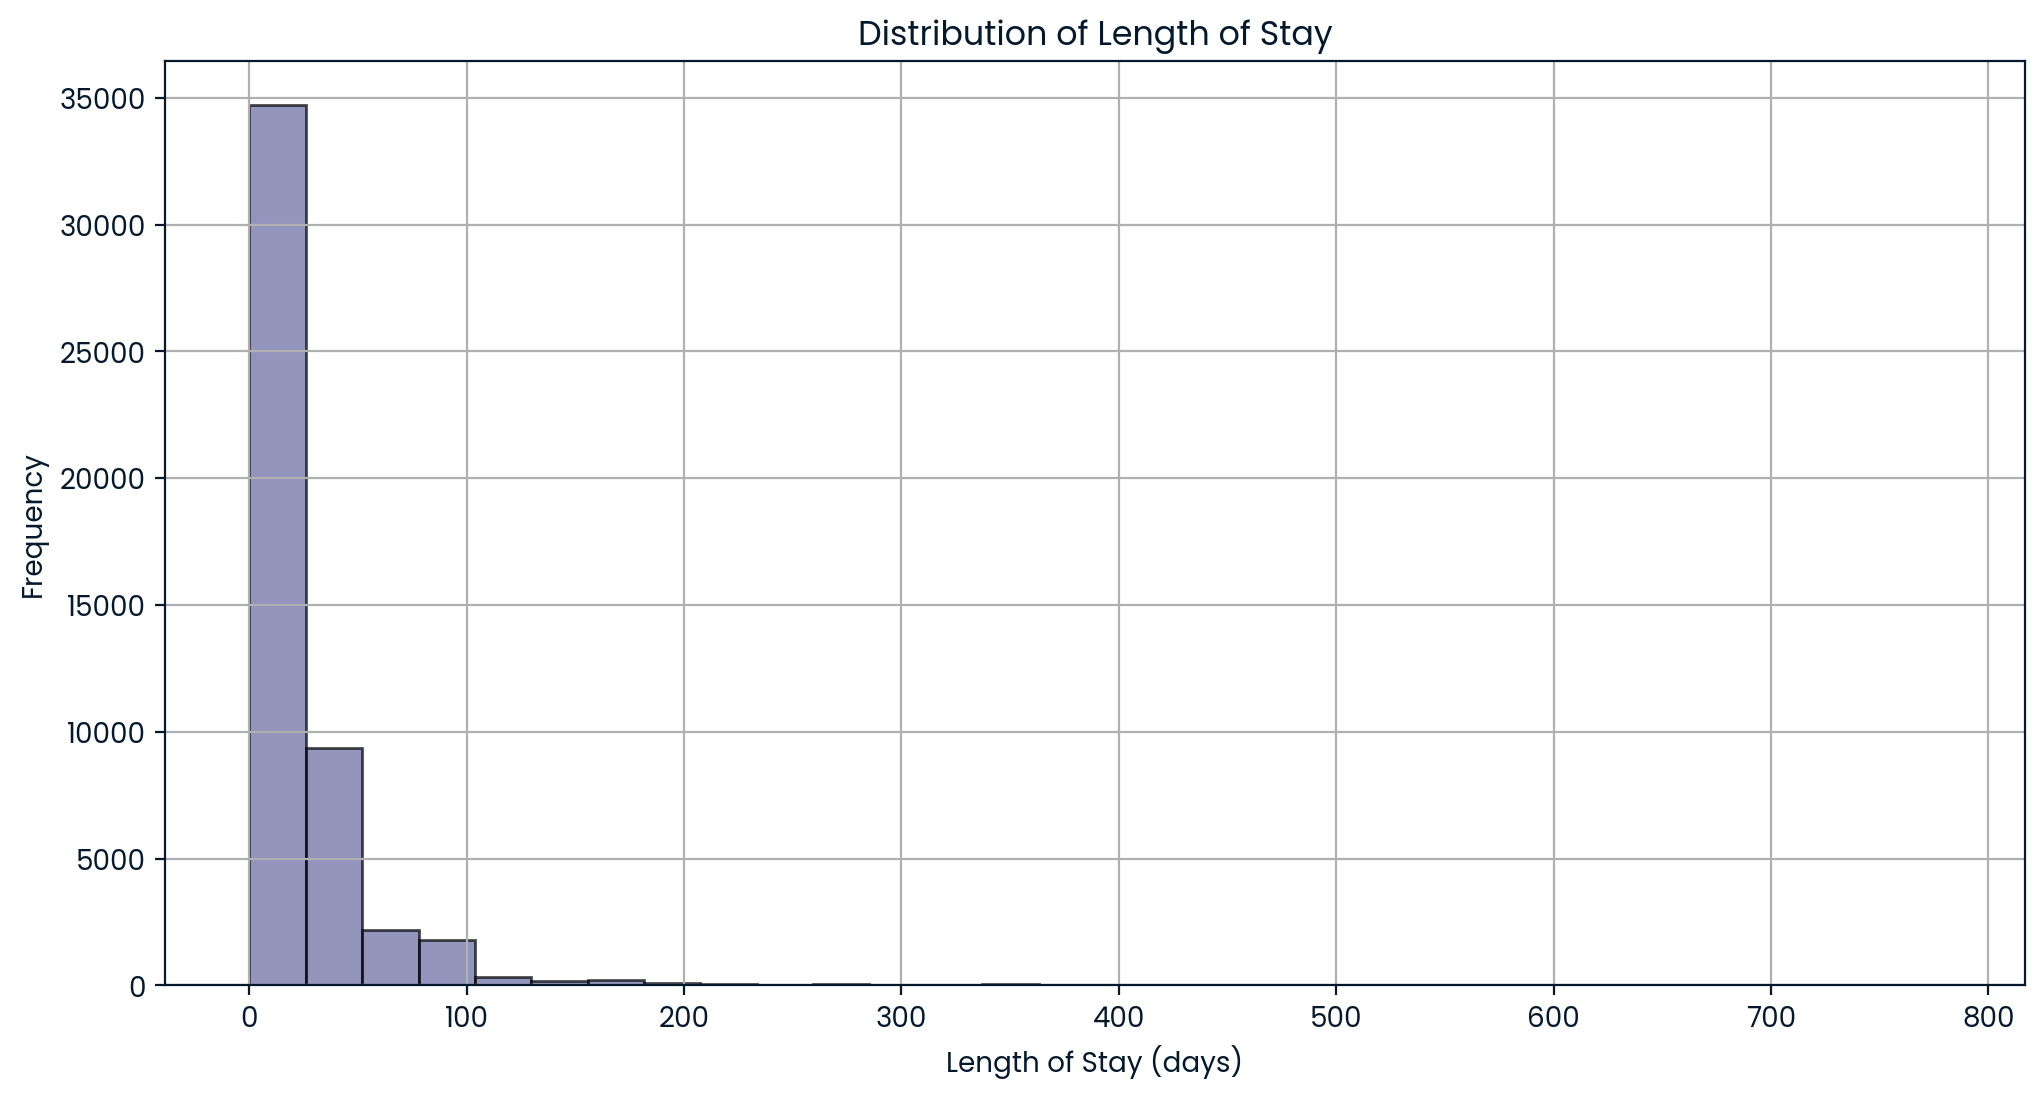

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for 'length_of_stay'
max_length_of_stay = df['length_of_stay'].max()
min_length_of_stay = df['length_of_stay'].min()
mean_length_of_stay = df['length_of_stay'].mean()

print("Maximum length of stay:", max_length_of_stay)
print("Minimum length of stay:", min_length_of_stay)
print("Mean length of stay:", mean_length_of_stay)
print("Length of stay is the number of days spent at the destination.")

# Plotting the distribution of 'length_of_stay' with a histogram
plt.figure(figsize=(12, 6))
plt.hist(df['length_of_stay'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



### Column 06 : Flight hour

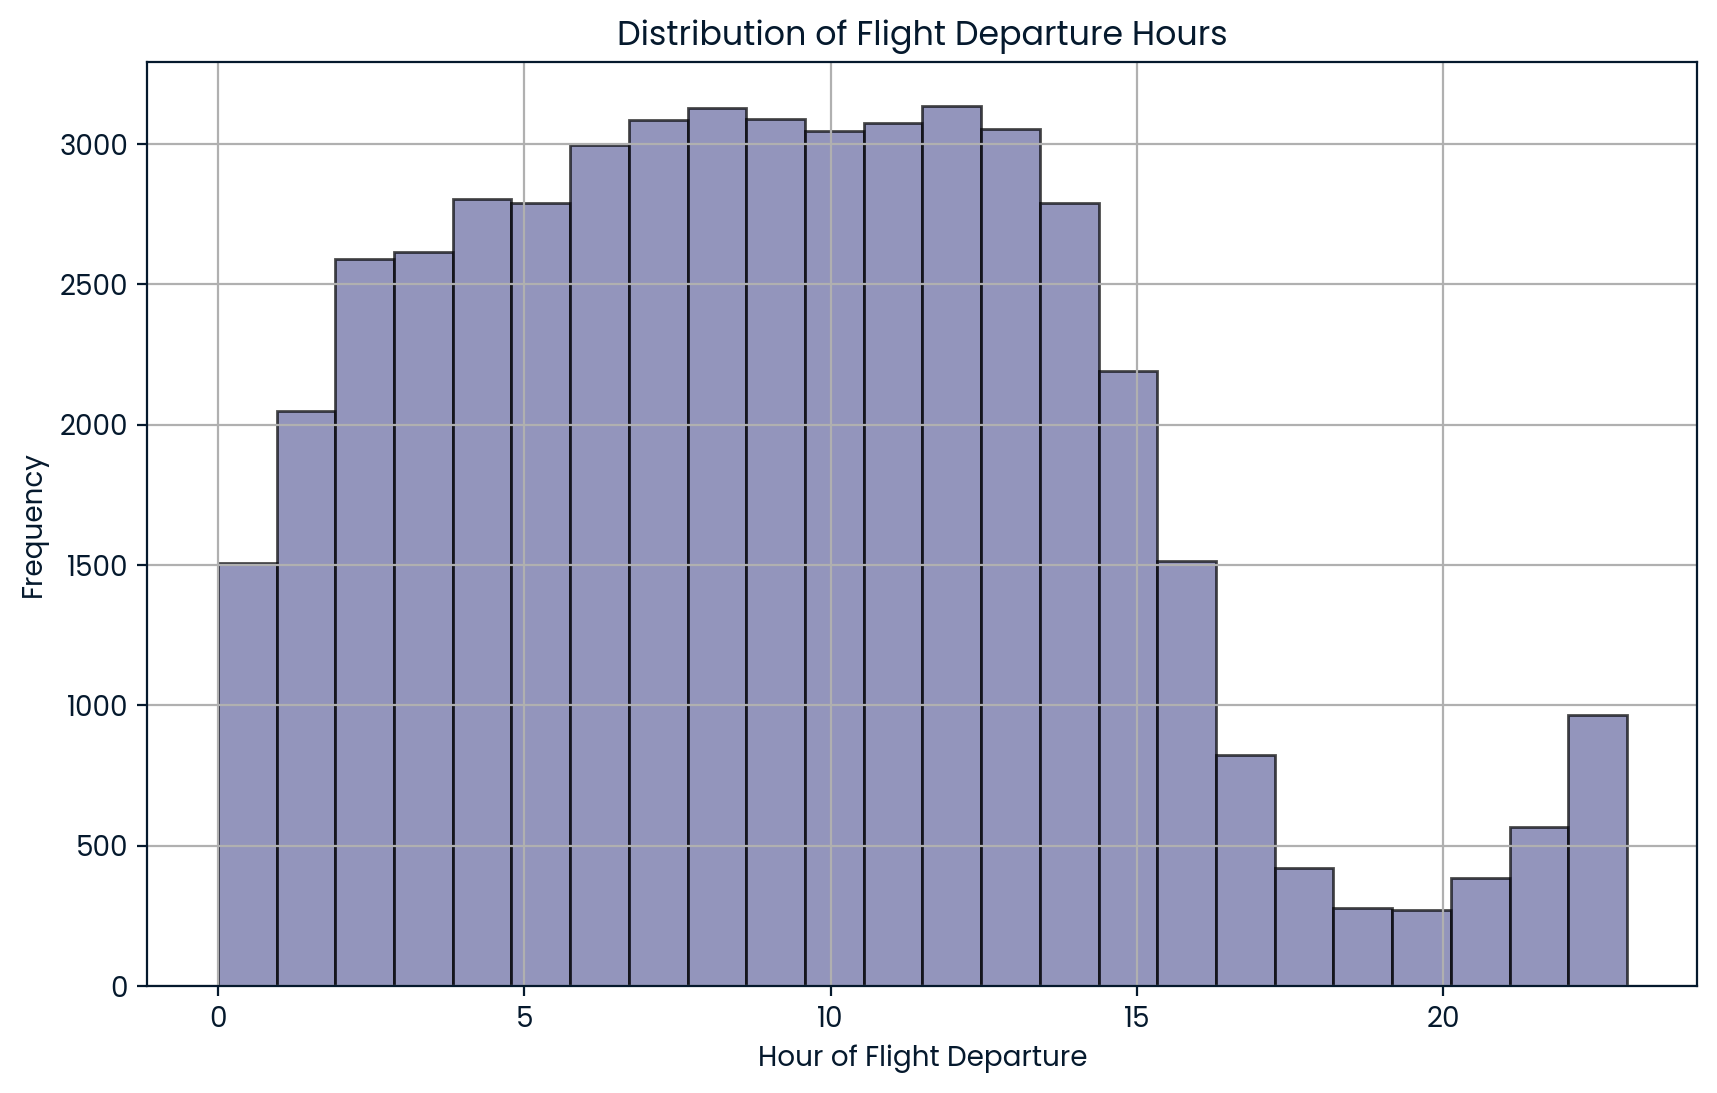

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df['flight_hour'], bins=24, edgecolor='k', alpha=0.7)
plt.title('Distribution of Flight Departure Hours')
plt.xlabel('Hour of Flight Departure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Column 07  : Flight day 

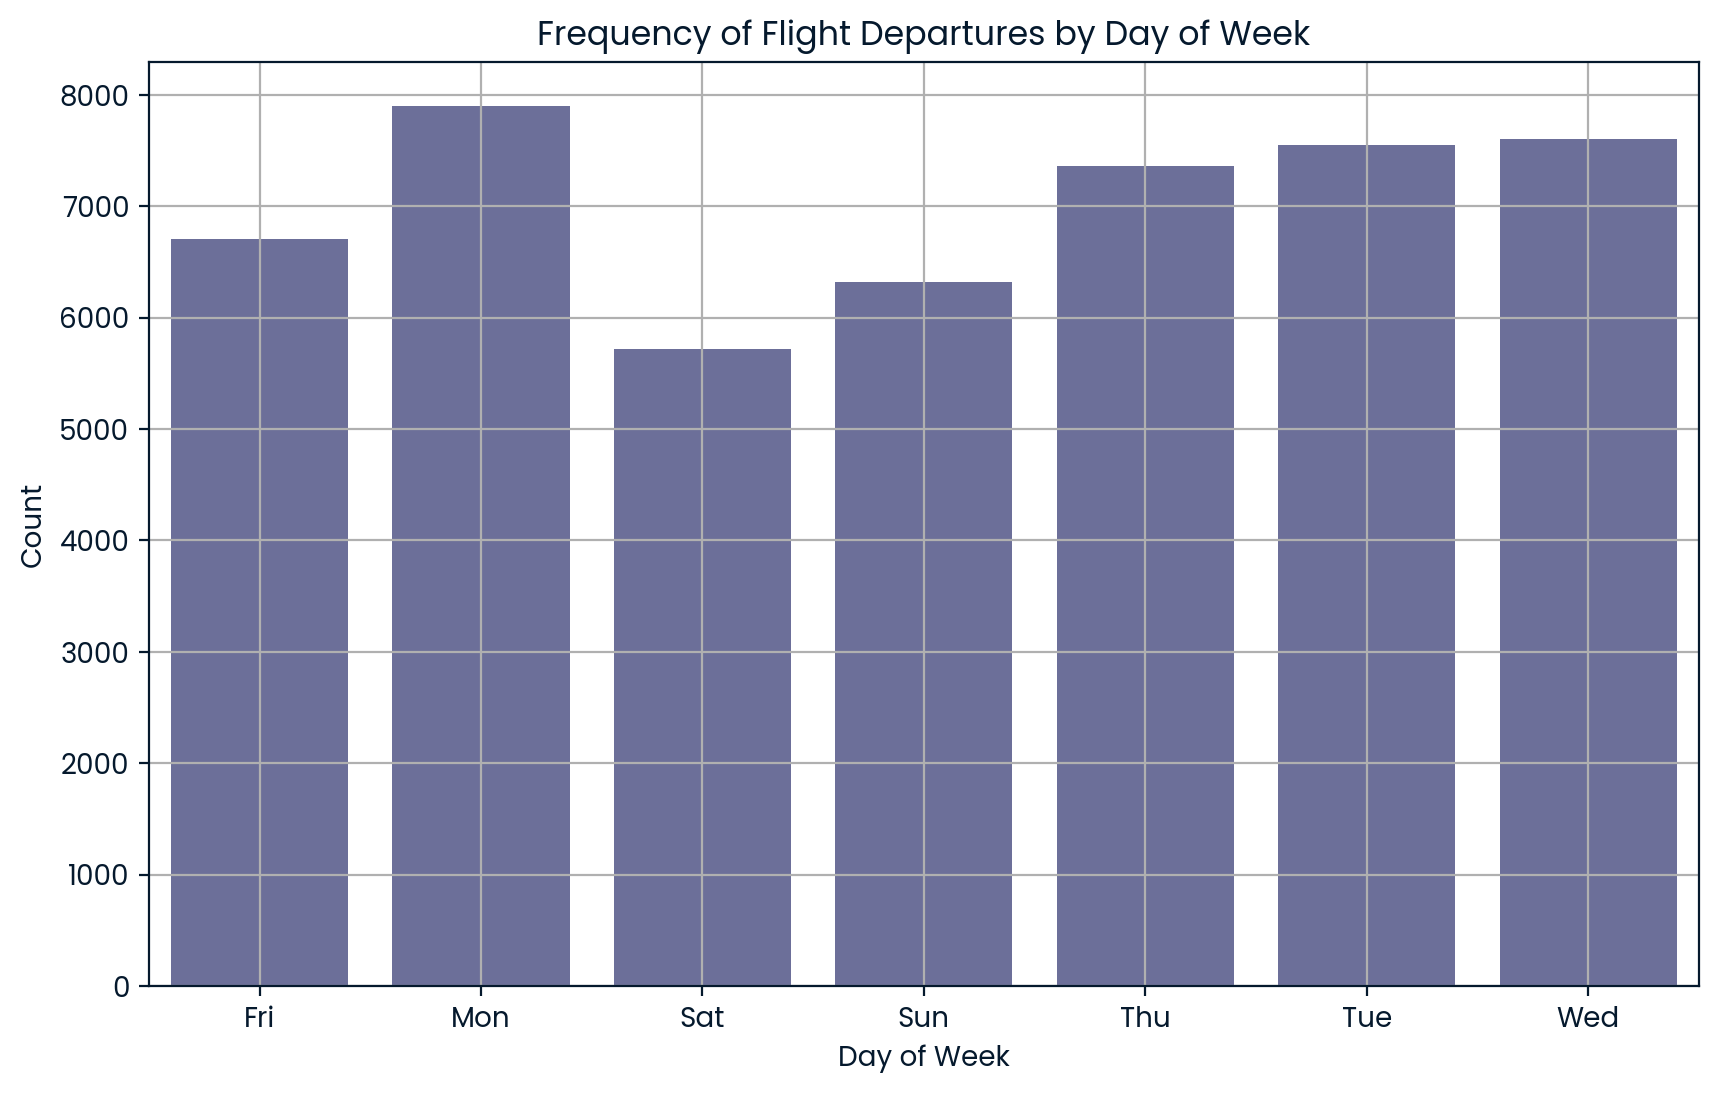

In [59]:
# 2. flight_day
plt.figure(figsize=(10, 6))
sns.countplot(x='flight_day', data=df, order=sorted(df['flight_day'].unique()))
plt.title('Frequency of Flight Departures by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['flight_day'] = label_encoder.fit_transform(df['flight_day'])

### Column 08 : route

In [61]:
df['route'].nunique()

798

In [62]:
route_counts = df['route'].value_counts()
print("Top 10 most frequent flight routes:")
print(route_counts.head(10))

Top 10 most frequent flight routes:
route
AKLKUL    2580
PENTPE     912
MELSGN     838
ICNSIN     792
DMKKIX     717
ICNSYD     683
DMKPER     672
DPSICN     654
DMKOOL     648
MELPEN     647
Name: count, dtype: int64


### Column 09 : Booking origin

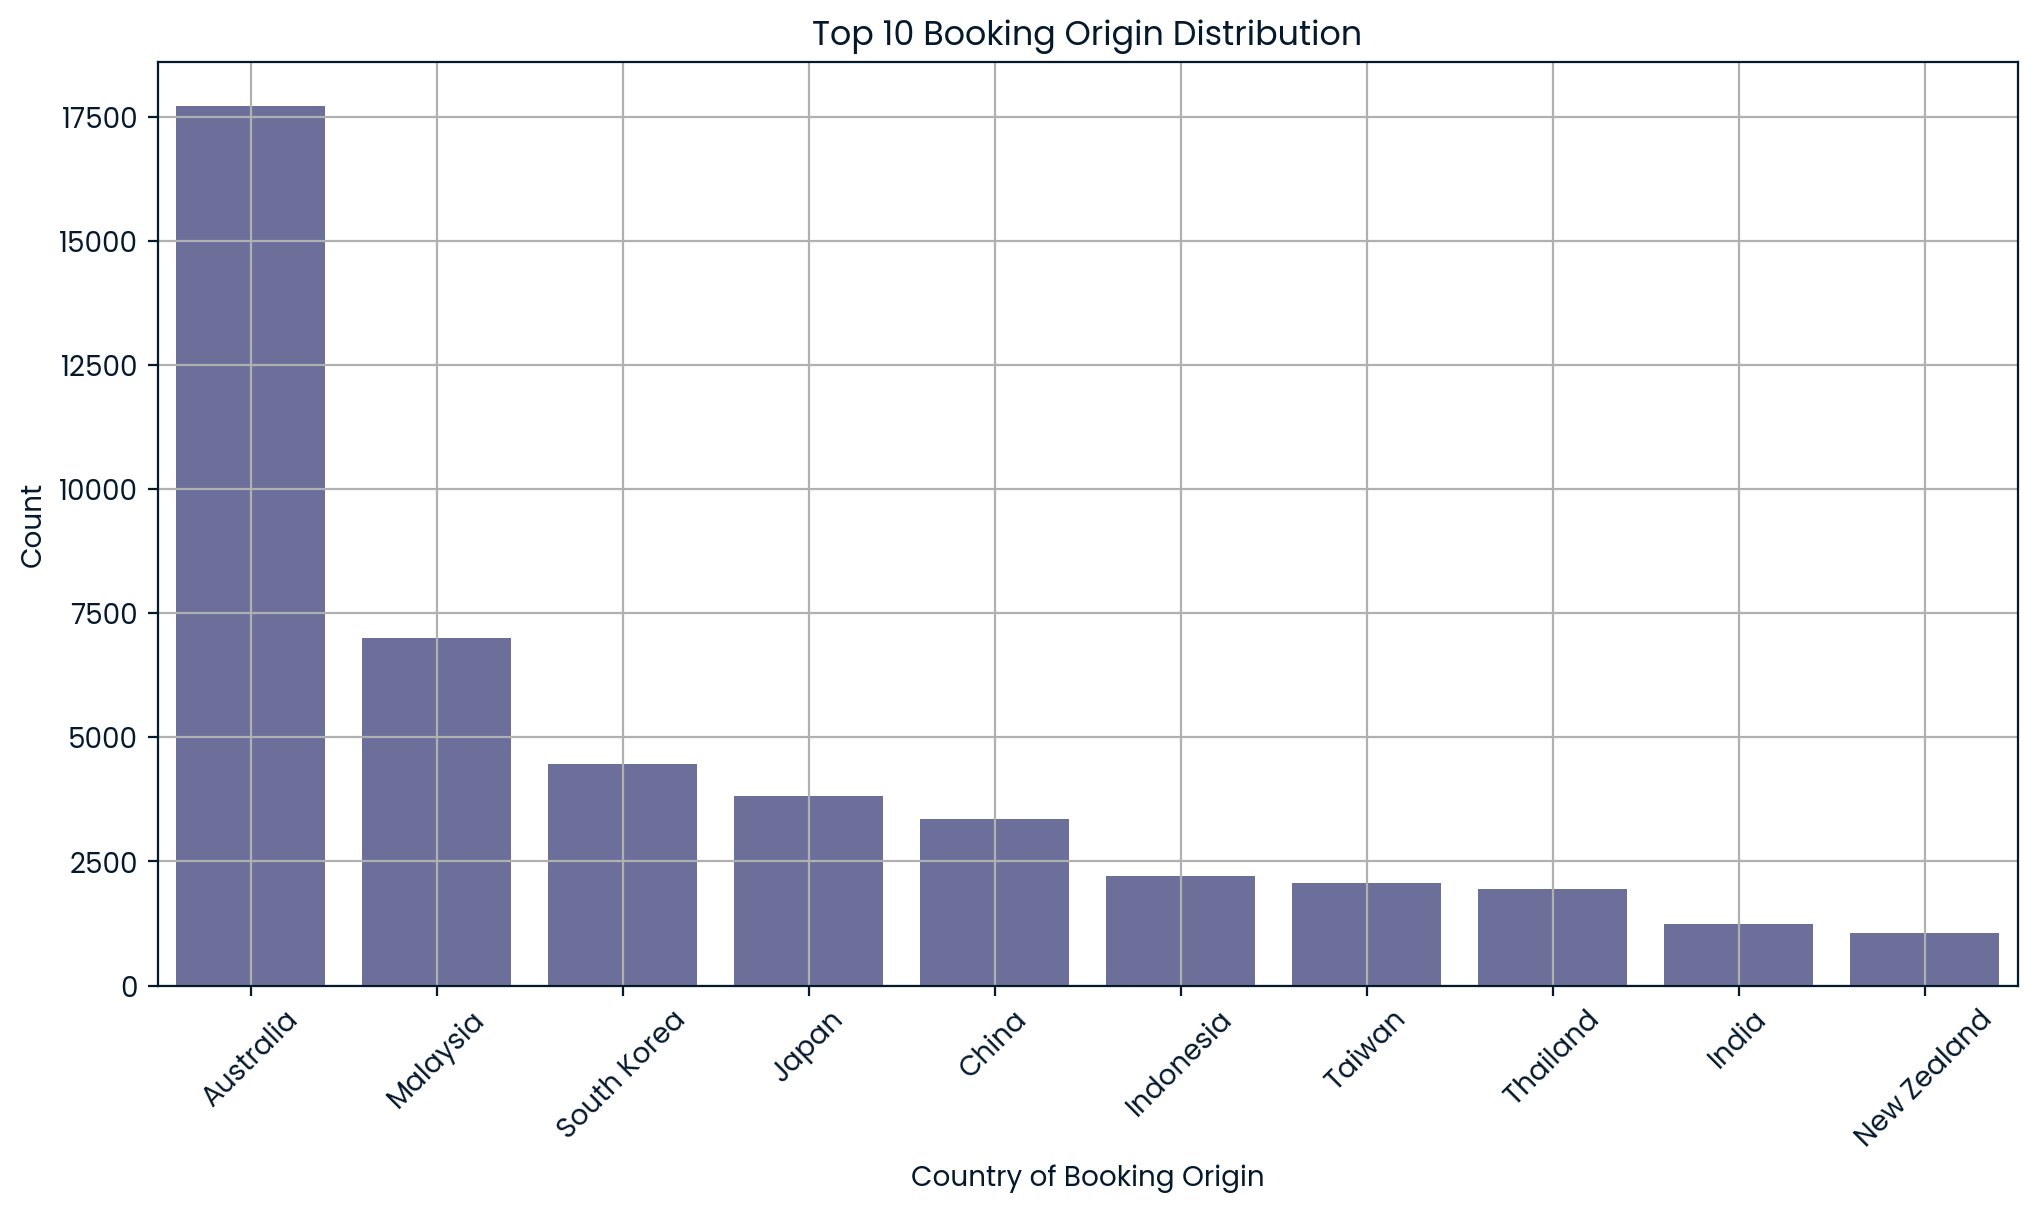

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='booking_origin', data=df, order=df['booking_origin'].value_counts().index[:10])
plt.title('Top 10 Booking Origin Distribution')
plt.xlabel('Country of Booking Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Column 10 : wants_extra_baggage

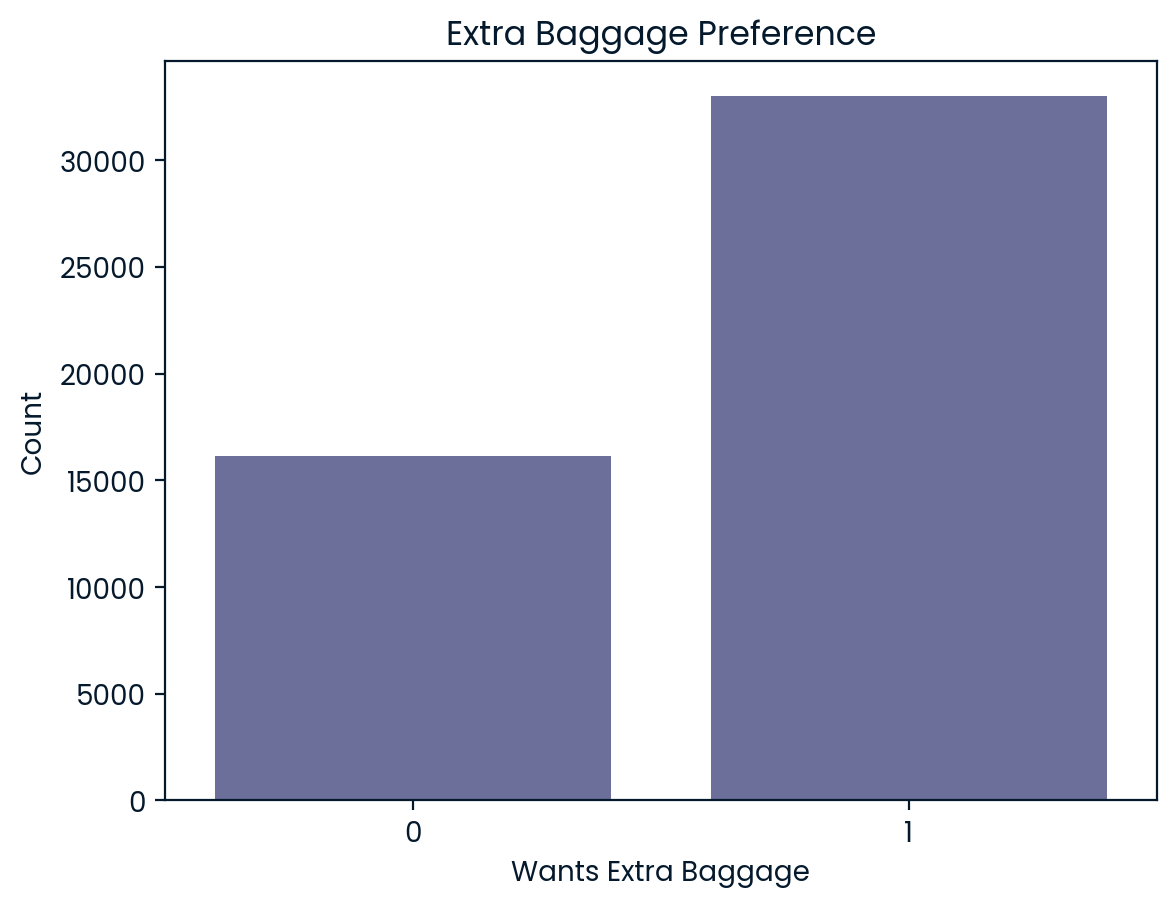

In [64]:
sns.countplot(x='wants_extra_baggage', data=df)
plt.title('Extra Baggage Preference')
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Count')
plt.show()


### Column 11 : wants_preferred_seat

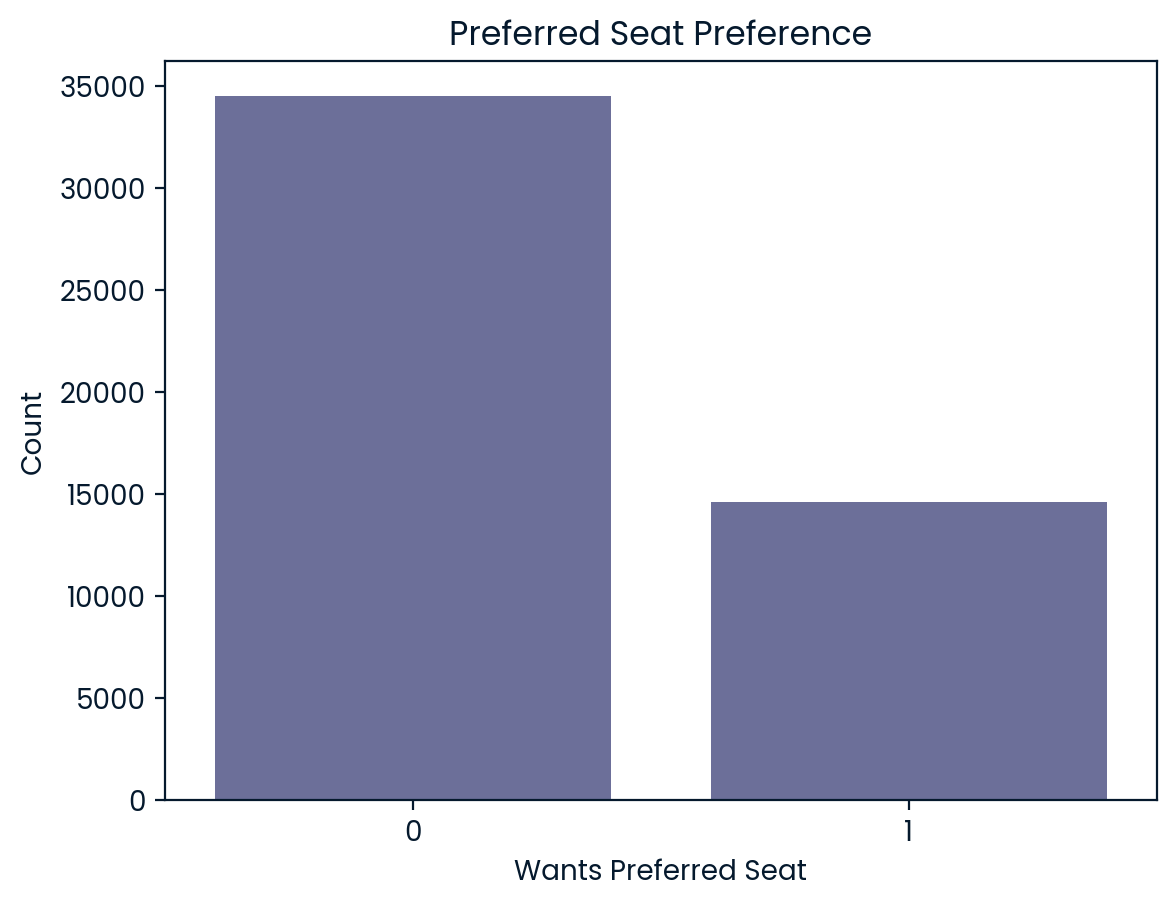

In [65]:
sns.countplot(x='wants_preferred_seat', data=df)
plt.title('Preferred Seat Preference')
plt.xlabel('Wants Preferred Seat')
plt.ylabel('Count')
plt.show()


### Column 12 : wants_in_flight_meals

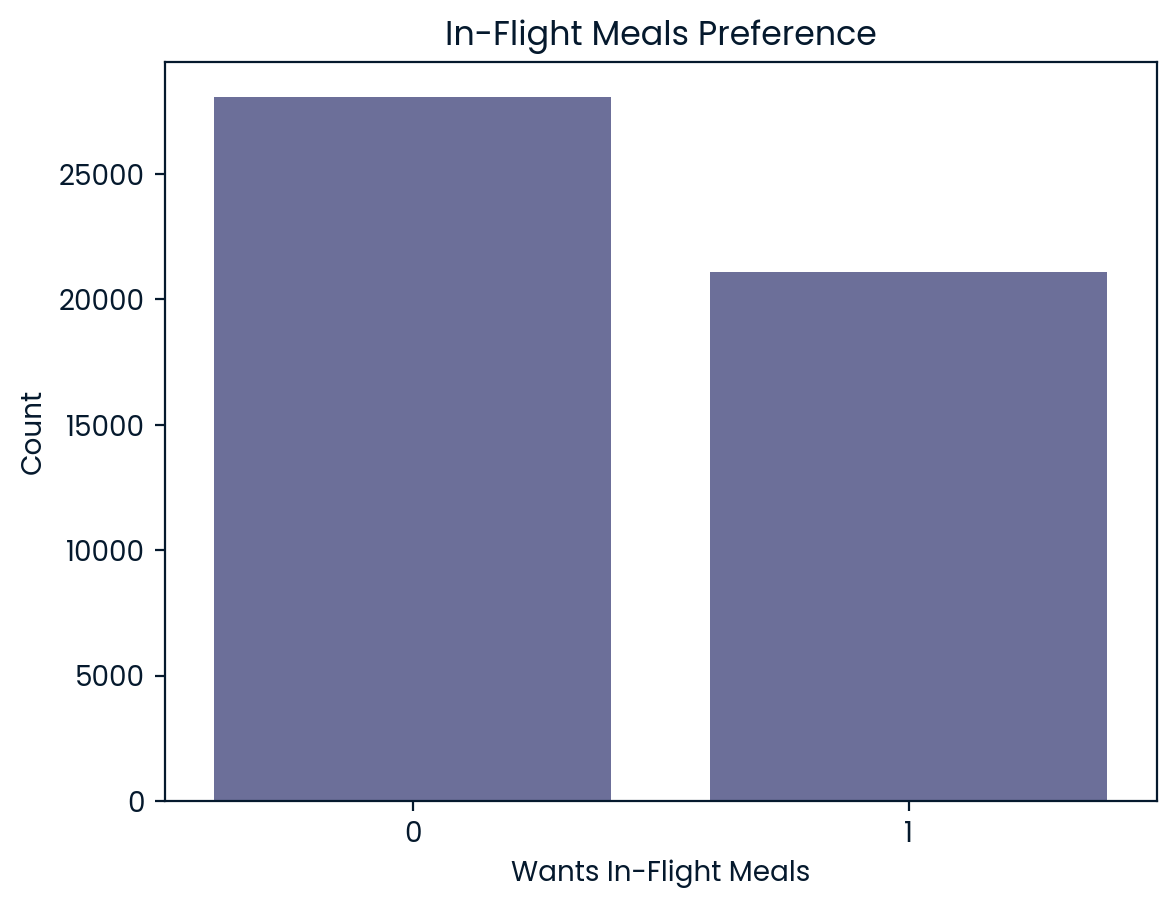

In [66]:

sns.countplot(x='wants_in_flight_meals', data=df)
plt.title('In-Flight Meals Preference')
plt.xlabel('Wants In-Flight Meals')
plt.ylabel('Count')
plt.show()


### Column 13 : Flight duration 

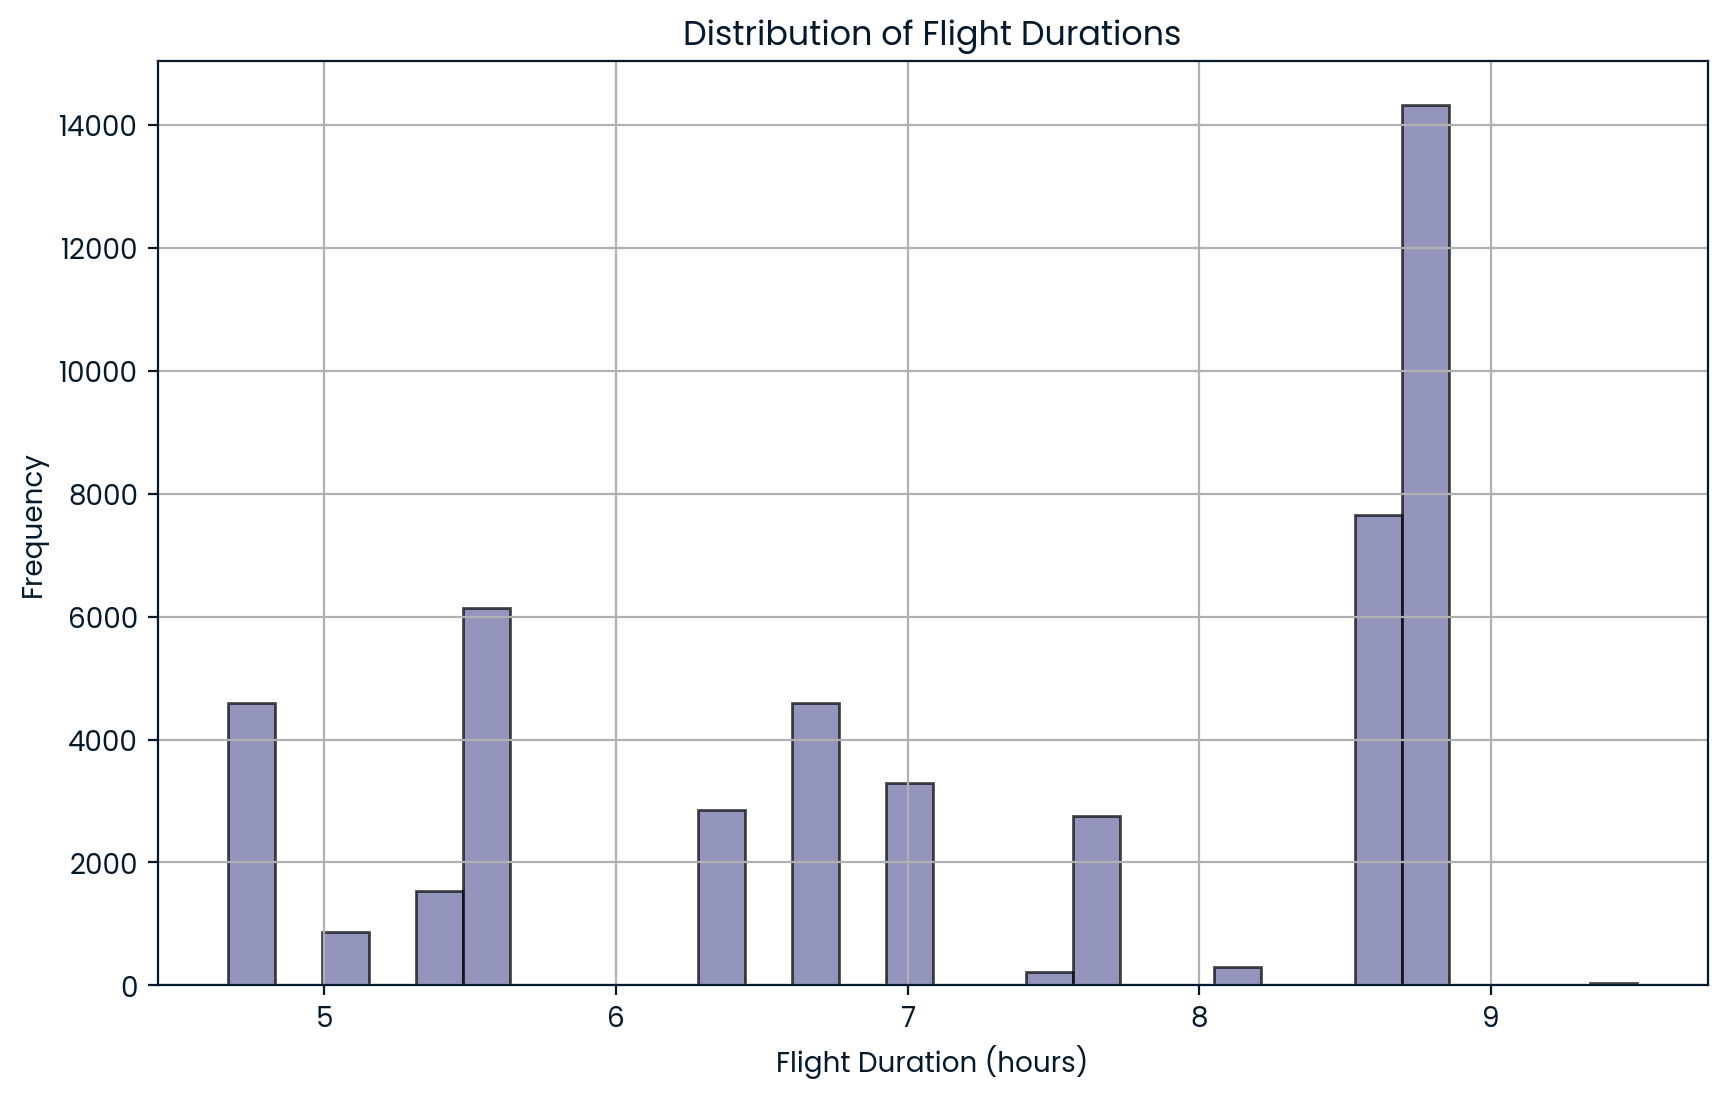

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(df['flight_duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Flight Durations')
plt.xlabel('Flight Duration (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Column 14 : Booking complete 

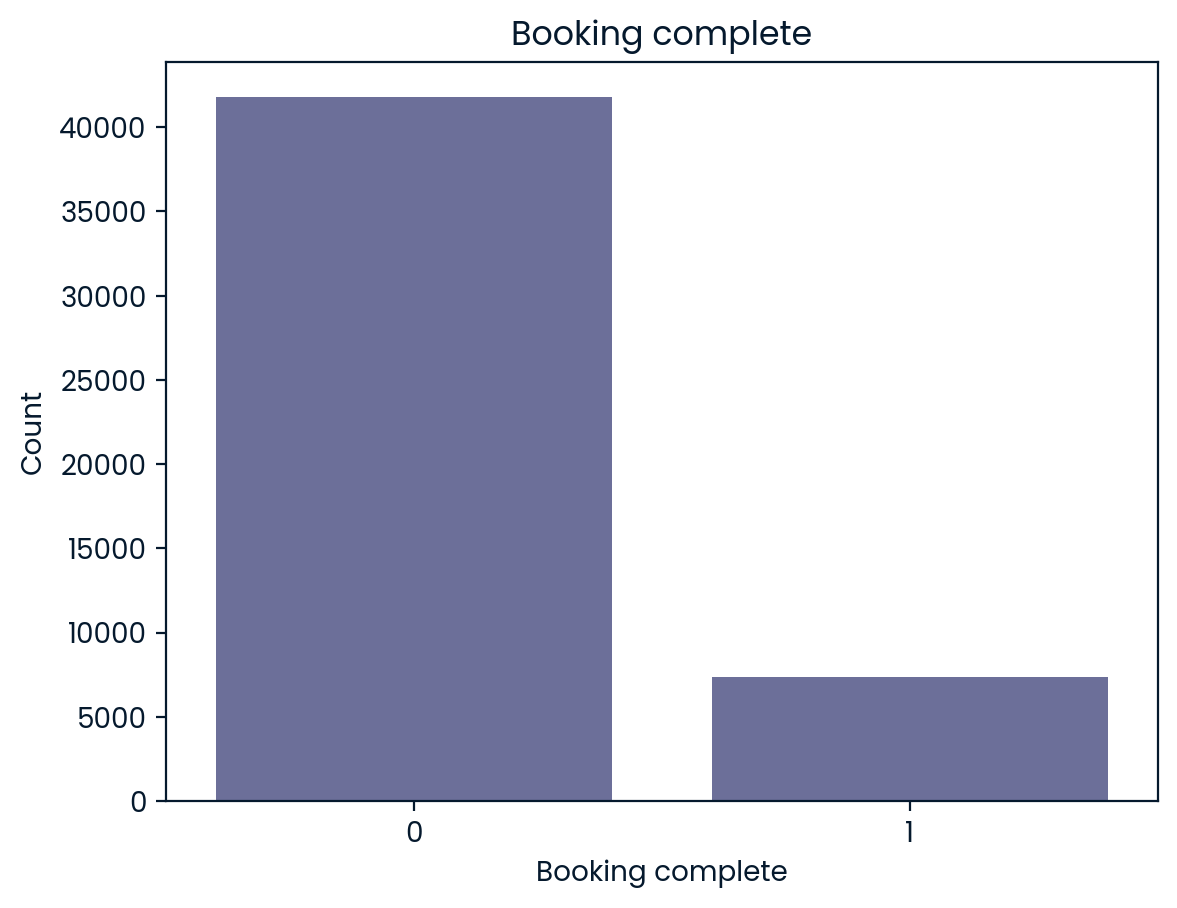

In [68]:
sns.countplot(x='booking_complete', data=df)
plt.title('Booking complete')
plt.xlabel('Booking complete')
plt.ylabel('Count')
plt.show()


In [69]:
booking_complete_percentage = (df['booking_complete'].sum() / len(df)) * 100
print(f"Percentage of completed bookings: {booking_complete_percentage:.2f}%")

Percentage of completed bookings: 14.97%


In [70]:
df['booking_complete'].value_counts()

booking_complete
0    41800
1     7362
Name: count, dtype: int64

# IMBALANCED DATA PROBLEM !!

In [71]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming df is your DataFrame
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Define the undersampler
rus = RandomUnderSampler(random_state=42)

# Apply the undersampler to the data
X_res, y_res = rus.fit_resample(X, y)

# Display the new class distribution
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_res)}")

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['booking_complete'])], axis=1)

# Display the first few rows of the resampled DataFrame
print(df_resampled.head())


Original class distribution: Counter({0: 41800, 1: 7362})
Resampled class distribution: Counter({0: 7362, 1: 7362})
       num_passengers  purchase_lead  ...  trip_type_RoundTrip  booking_complete
11840               1             35  ...                 True                 0
555                 1            155  ...                 True                 0
40581               2             21  ...                 True                 0
22219               2            172  ...                 True                 0
19178               1              9  ...                 True                 0

[5 rows x 17 columns]


In [72]:
df_resampled.shape

(14724, 17)

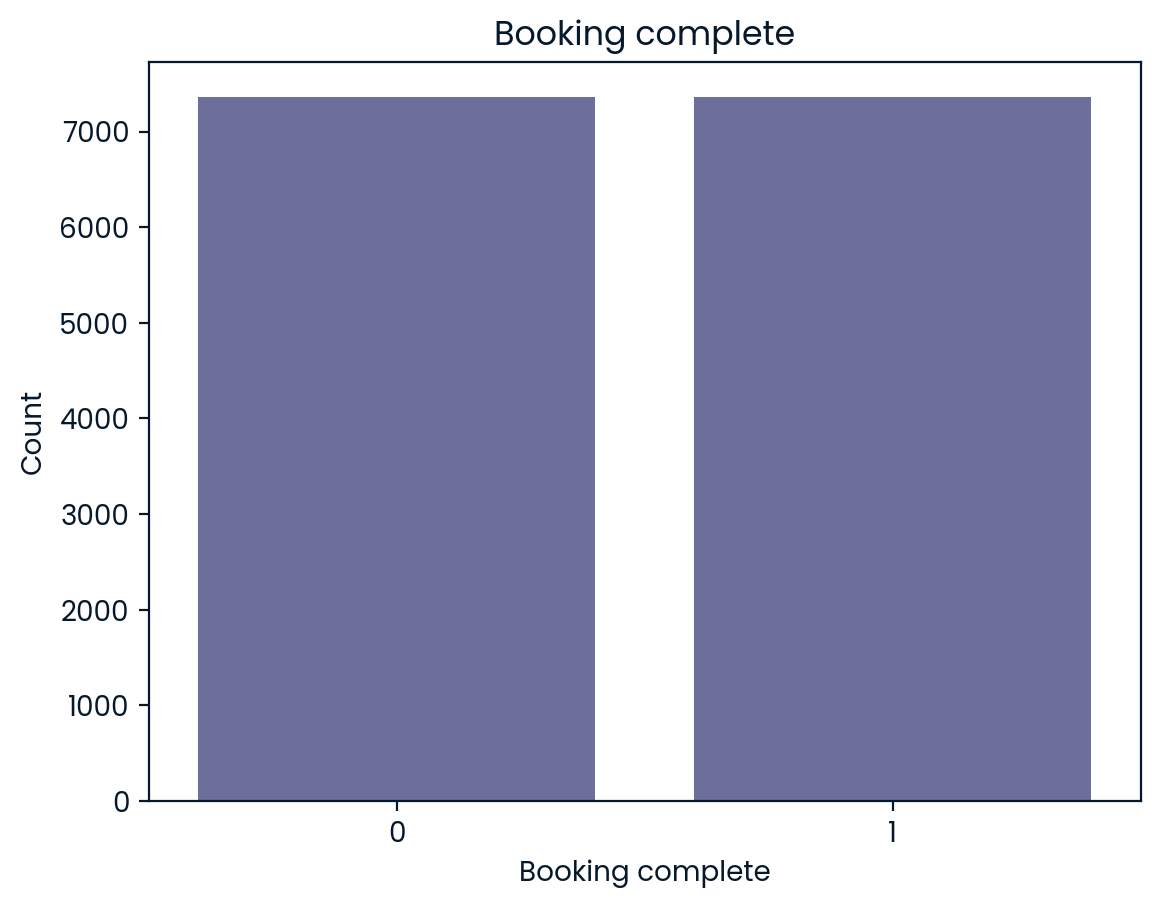

In [73]:
sns.countplot(x='booking_complete', data=df_resampled)
plt.title('Booking complete')
plt.xlabel('Booking complete')
plt.ylabel('Count')
plt.show()


## Some feature engineering

correlation 

                       num_passengers  ...  booking_complete
num_passengers               1.000000  ...          0.031425
purchase_lead                0.202643  ...         -0.033621
length_of_stay              -0.121440  ...         -0.066723
flight_hour                  0.008458  ...          0.013407
flight_day                  -0.011425  ...          0.011627
wants_extra_baggage          0.121675  ...          0.094810
wants_preferred_seat         0.043708  ...          0.067942
wants_in_flight_meals        0.030821  ...          0.027883
flight_duration             -0.053053  ...         -0.149252
booking_complete             0.031425  ...          1.000000

[10 rows x 10 columns]


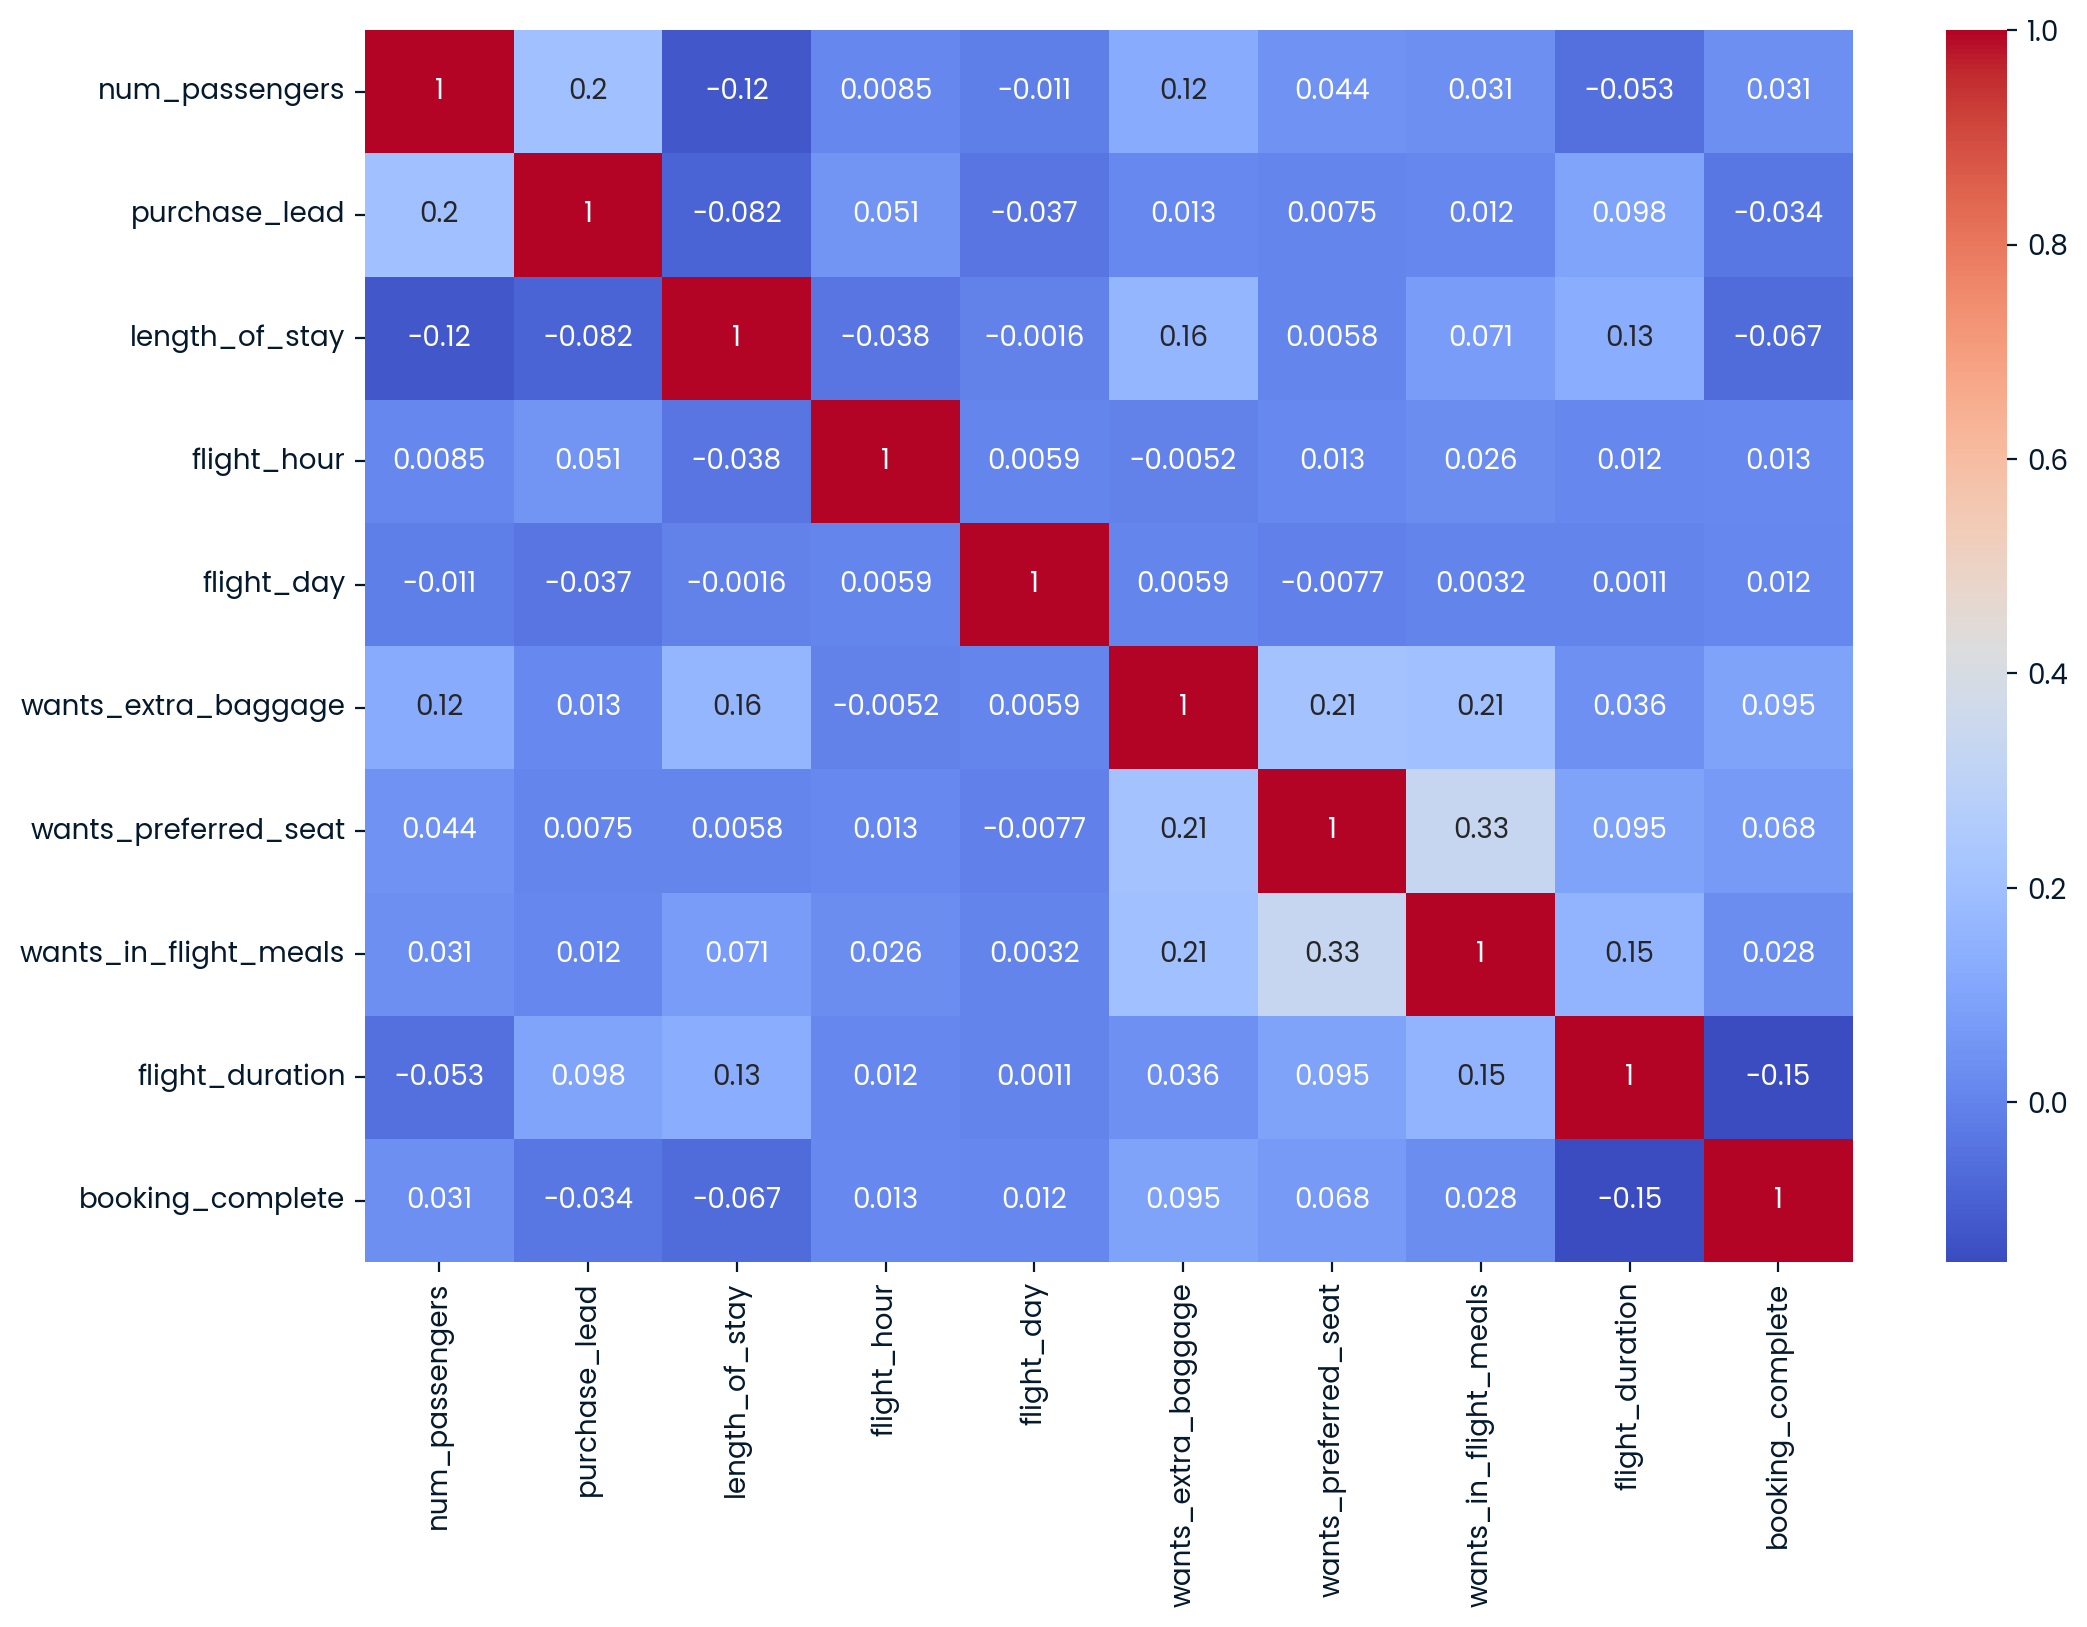

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select only numeric columns
numeric_df = df_resampled.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### Key Observations:
_**flight_duration**_ has the strongest negative correlation with booking_complete (-0.1493), indicating longer flights might be less likely to complete the booking.


_**wants_extra_baggage**_, _**wants_preferred_seat**_, and _**wants_in_flight_meals**_ have positive correlations with booking_complete, suggesting customers opting for these services are more likely to complete bookings.

In [75]:
df_resampled['total_service_preferences'] = df_resampled['wants_extra_baggage'] + df_resampled['wants_preferred_seat'] + df_resampled['wants_in_flight_meals']


In [76]:
df_resampled=df_resampled.drop(columns=['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals'])

In [77]:
# Save the resampled DataFrame to a CSV file
df_resampled.to_csv('customer_booking_preprocessed.csv', index=False)